# Bidirectional LSTM Example

Here I will be running through `bidirectional_lstm.py` and figuring out how it works.

In [1]:
# Some imports
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.embedding_ops import embedding
from tflearn.layers.recurrent import bidirectional_rnn, BasicLSTMCell
from tflearn.layers.estimator import regression

In [27]:
# Other imports (not from the code)
import numpy as np
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

## Loading The Data

In [2]:
# IMDB Dataset loading
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
trainX, trainY = train
testX, testY = test

## Visualising The Data

I have no idea what is actually in this training set.

(array([ 621408.,  783389.,  892934.,  940633.,  765715.,  661574.,
         545923.,  487220.,  402057.,  311749.]),
 array([ 0.        ,  0.39999566,  0.79999131,  1.19998697,  1.59998263,
         1.99997828,  2.39997394,  2.7999696 ,  3.19996525,  3.59996091,
         3.99995657]),
 <a list of 10 Patch objects>)

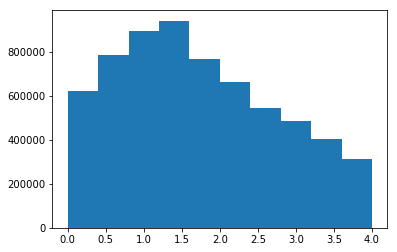

In [38]:
plt.hist(np.log10(list(it.chain.from_iterable(trainX))))

(array([  5.00000000e+00,   2.90000000e+01,   4.41000000e+02,
          1.50600000e+03,   6.37700000e+03,   7.31400000e+03,
          4.32200000e+03,   1.99500000e+03,   5.01000000e+02,
          1.00000000e+01]),
 array([ 2.39789527,  2.95255496,  3.50721465,  4.06187434,  4.61653403,
         5.17119372,  5.72585341,  6.2805131 ,  6.83517279,  7.38983247,
         7.94449216]),
 <a list of 10 Patch objects>)

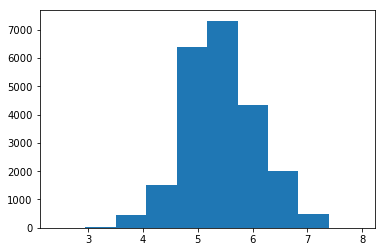

In [39]:
plt.hist(np.log(list(map(len, trainX))))

In [40]:
# Data preprocessing
# Sequence padding
trainX = pad_sequences(trainX, maxlen=200, value=0.)
testX = pad_sequences(testX, maxlen=200, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY, nb_classes=2)
testY = to_categorical(testY, nb_classes=2)

In [41]:
# Network building
net = input_data(shape=[None, 200])
net = embedding(net, input_dim=20000, output_dim=128)
net = bidirectional_rnn(net, BasicLSTMCell(128), BasicLSTMCell(128))
net = dropout(net, 0.5)
net = fully_connected(net, 2, activation='softmax')
net = regression(net, optimizer='adam', loss='categorical_crossentropy')

In [ ]:
# Training
model = tflearn.DNN(net, clip_gradients=0., tensorboard_verbose=2)
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=64)

Training Step: 878  | total loss: 0.64585 | time: 385.155s
| Adam | epoch: 003 | loss: 0.64585 - acc: 0.6035 -- iter: 15616/20250
